In [ ]:
# Import required packages
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_location = "..\data"
train_data_location_name = f"{file_location}\Training.csv"
test_data_location_name = f"{file_location}\Testing.csv"


In [4]:
# Load the data 
# We're loading both training and testing data to see what we have to work with

# Load Train Data
train_data = pd.read_csv(train_data_location_name)
print(train_data.shape)
# Load Test Data
test_data = pd.read_csv(test_data_location_name)
print(test_data.shape)

(4920, 134)
(42, 133)


In [5]:
# Lets visually explore the train data

train_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [6]:
# Lets visually explore the test data

test_data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [7]:
# Data Cleaning: The train data has an extra column and must be removed

# Schema Change
train_data.drop('Unnamed: 133', axis=1, inplace=True) 
train_data["prognosis"].str.strip()

# Lets preview the test data to confirm the column has been removed
train_data.head()


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [8]:
# Upon inspection it looks like test_data only has one observation per prognosis. Hence, it is not useful for ML purposes. 

# Decision: We have made the decision to combine the test and train and later use train_test_split from scikit_learn

union_df_reset_index = pd.concat([train_data, test_data], ignore_index=True)

In [9]:
# Remove the trailing whitespaces
union_df_reset_index["prognosis"] = union_df_reset_index["prognosis"].str.strip()

# Filter for the specific data
filtered = union_df_reset_index[union_df_reset_index['prognosis'].isin(['Heart attack', 'Tuberculosis', 'Pneumonia','GERD'])].copy()

# Check out the shape of the dataframe
print(f"Train data shape{filtered.shape}")


Train data shape(484, 133)


In [10]:
# Import required scikit_learn packages

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_validate, GridSearchCV


In [11]:
# Define symptom columns (all columns except 'prognosis')
symptom_columns = [col for col in filtered.columns if col != 'prognosis']
print(f"\nNumber of symptom columns: {len(symptom_columns)}")


Number of symptom columns: 132


In [12]:
# Lets define and X and y for the models.

X = filtered[symptom_columns] # Features
y = filtered['prognosis'] # Labels
print(y)

20              GERD
21              GERD
22              GERD
23              GERD
24              GERD
            ...     
4908    Heart attack
4922            GERD
4945    Tuberculosis
4947       Pneumonia
4949    Heart attack
Name: prognosis, Length: 484, dtype: object


In [13]:
# We need to encode the categorical variables

label_encoder= LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [14]:
# Here we will split the data in train and test. 
# stratify=y_encoded in the function parameter ensures class proportions are maintained in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Lets confirm the train and test split
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

print("\nPrognosis distribution in training set:")
train_prognosis_counts = pd.Series(y_train).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(train_prognosis_counts)

print("\nPrognosis distribution in test set:")
test_prognosis_counts = pd.Series(y_test).map(lambda x: label_encoder.inverse_transform([x])[0]).value_counts(normalize=True)
print(test_prognosis_counts)


Shape of X_train: (387, 132)
Shape of X_test: (97, 132)
Shape of y_train: (387,)
Shape of y_test: (97,)

Prognosis distribution in training set:
Tuberculosis    0.250646
Heart attack    0.250646
GERD            0.250646
Pneumonia       0.248062
Name: proportion, dtype: float64

Prognosis distribution in test set:
Pneumonia       0.257732
GERD            0.247423
Tuberculosis    0.247423
Heart attack    0.247423
Name: proportion, dtype: float64


In [ ]:
# Get the all the columns in test on a list to ensure the schemas are same on both dataframe
all_zero_cols_in_train_fold = X_train.columns[(X_train == 0).all()].tolist()

In [16]:
if all_zero_cols_in_train_fold:
# Remove these columns from both X_train_processed_fold and X_test_processed_fold
    X_train_final_fold = X_train.drop(columns=all_zero_cols_in_train_fold)
    X_test_final_fold = X_test.drop(columns=all_zero_cols_in_train_fold)
else:
    X_train_final_fold = X_train
    X_test_final_fold = X_test

In [17]:
# Initialize the Random Forest Classifier
# n_estimators: Number of trees in the forest. A higher number generally improves performance.
# random_state: For reproducibility.
# class_weight='balanced': Addresses potential class imbalance by giving more weight to minority classes.
rf_model = RandomForestClassifier(
    n_estimators=200,      # A common starting point, can be tuned
    random_state=42,
    class_weight='balanced',
    max_features='sqrt',   # Number of features to consider when looking for the best split
    min_samples_leaf=5     # Minimum number of samples required to be at a leaf node
)

print("Training Random Forest Classifier...")
rf_model.fit(X_train, y_train)
print("Random Forest Classifier training complete!")
rf_model

Training Random Forest Classifier...
Random Forest Classifier training complete!


RandomForestClassifier(class_weight='balanced', min_samples_leaf=5,
                       n_estimators=200, random_state=42)

In [18]:
# Define the cross-validation strategy
# StratifiedKFold ensures each fold has the same proportion of classes as the full dataset.
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [19]:
# Hyperparameter Tuning with GridSearchCV ---
print("Hyperparameter Tuning with GridSearchCV")

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

Hyperparameter Tuning with GridSearchCV


In [ ]:
# Lets define the GridSearch strategy

grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=cv_strategy,
    scoring='f1_weighted',
    n_jobs=-1,
    verbose=2
)

In [21]:
print("Starting GridSearchCV for Hyperparameter Tuning...")
grid_search.fit(X_train, y_train)

print("\nGridSearchCV complete!")

best_params = grid_search.best_params_
print(f"\nBest Parameters found by GridSearchCV: {best_params}")

best_score = grid_search.best_score_
print(f"Best F1-weighted Score from GridSearchCV: {best_score:.4f}")

best_rf_model = grid_search.best_estimator_
print("\nBest Random Forest Model (from GridSearchCV):")
print(best_rf_model)

Starting GridSearchCV for Hyperparameter Tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits

GridSearchCV complete!

Best Parameters found by GridSearchCV: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1-weighted Score from GridSearchCV: 1.0000

Best Random Forest Model (from GridSearchCV):
RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)


In [22]:
# Define scoring metrics for multi-class classification
scoring = {
    'accuracy': 'accuracy',
    'precision_weighted': 'precision_weighted',
    'recall_weighted': 'recall_weighted',
    'f1_weighted': 'f1_weighted'
}

In [ ]:
# Performing stratified cross-validation
print("Performing 5-Fold Stratified Cross-Validation...")
cv_results = cross_validate(
    estimator=best_rf_model,
    X=X_train_final_fold,        # Use the fully preprocessed features
    y=y_train,      # Use the encoded target
    cv=cv_strategy,
    scoring=scoring,
    return_train_score=False # We usually only care about test scores for evaluation
)

Performing 5-Fold Stratified Cross-Validation...


In [24]:
# Convert results to a DataFrame for easy viewing
cv_results_df = pd.DataFrame(cv_results)

In [25]:
# Print the cross validation results 
print("\nCross-Validation Results per Fold:")
print(cv_results_df)


Cross-Validation Results per Fold:
   fit_time  score_time  test_accuracy  test_precision_weighted  \
0  0.274000    0.014999            1.0                      1.0   
1  0.156003    0.018999            1.0                      1.0   
2  0.162008    0.014996            1.0                      1.0   
3  0.172000    0.029999            1.0                      1.0   
4  0.192004    0.018996            1.0                      1.0   

   test_recall_weighted  test_f1_weighted  
0                   1.0               1.0  
1                   1.0               1.0  
2                   1.0               1.0  
3                   1.0               1.0  
4                   1.0               1.0  


In [26]:
# Calculate mean and standard error of the mean (SEM) for each metric
cv_metrics_summary = cv_results_df.agg(['mean', 'sem'])

In [27]:
# y_pred will be numerical (encoded labels)
y_pred = best_rf_model.predict(X_test)

In [28]:
# Reverse encode the labels back

y_test_labels = label_encoder.inverse_transform(y_test)
y_pred_labels = label_encoder.inverse_transform(y_pred) # y_pred from model.predict is always numerical

In [29]:
# Measuring Accuracy of the Model
# Accuracy Score
accuracy = accuracy_score(y_test_labels, y_pred_labels)
print(f"\nAccuracy Score: {accuracy:.4f}")


Accuracy Score: 1.0000


In [30]:
# 2. Confusion Matrix
# Ensure labels are in the correct order for the confusion matrix
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels, labels=label_encoder.classes_)
print("\nConfusion Matrix:")
# Display with row/column labels for better understanding
conf_matrix_df = pd.DataFrame(conf_matrix, index=label_encoder.classes_, columns=label_encoder.classes_)
print(conf_matrix_df)


Confusion Matrix:
              GERD  Heart attack  Pneumonia  Tuberculosis
GERD            24             0          0             0
Heart attack     0            24          0             0
Pneumonia        0             0         25             0
Tuberculosis     0             0          0            24


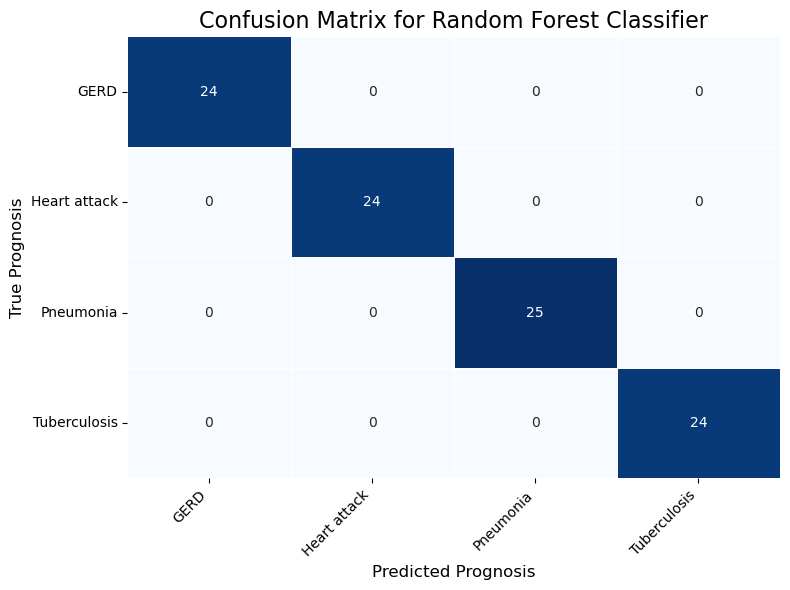

In [31]:
# Visualize Confusion Matrix

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=.5)
plt.title('Confusion Matrix for Random Forest Classifier', fontsize=16)
plt.xlabel('Predicted Prognosis', fontsize=12)
plt.ylabel('True Prognosis', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [32]:
# Visualize Classification Report (Precision, Recall, F1-Score)
class_report = classification_report(y_test_labels, y_pred_labels, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

        GERD       1.00      1.00      1.00        24
Heart attack       1.00      1.00      1.00        24
   Pneumonia       1.00      1.00      1.00        25
Tuberculosis       1.00      1.00      1.00        24

    accuracy                           1.00        97
   macro avg       1.00      1.00      1.00        97
weighted avg       1.00      1.00      1.00        97




Top 20 Most Important Symptoms (from Best Random Forest Model):
cough                  0.104179
stomach_pain           0.072608
rusty_sputum           0.064209
phlegm                 0.062547
ulcers_on_tongue       0.060255
loss_of_appetite       0.052302
fast_heart_rate        0.050752
high_fever             0.050543
swelled_lymph_nodes    0.049385
sweating               0.048904
malaise                0.048754
acidity                0.047836
yellowing_of_eyes      0.046274
blood_in_sputum        0.044540
chills                 0.039829
mild_fever             0.037145
fatigue                0.032473
weight_loss            0.031651
breathlessness         0.028536
vomiting               0.025332
dtype: float64


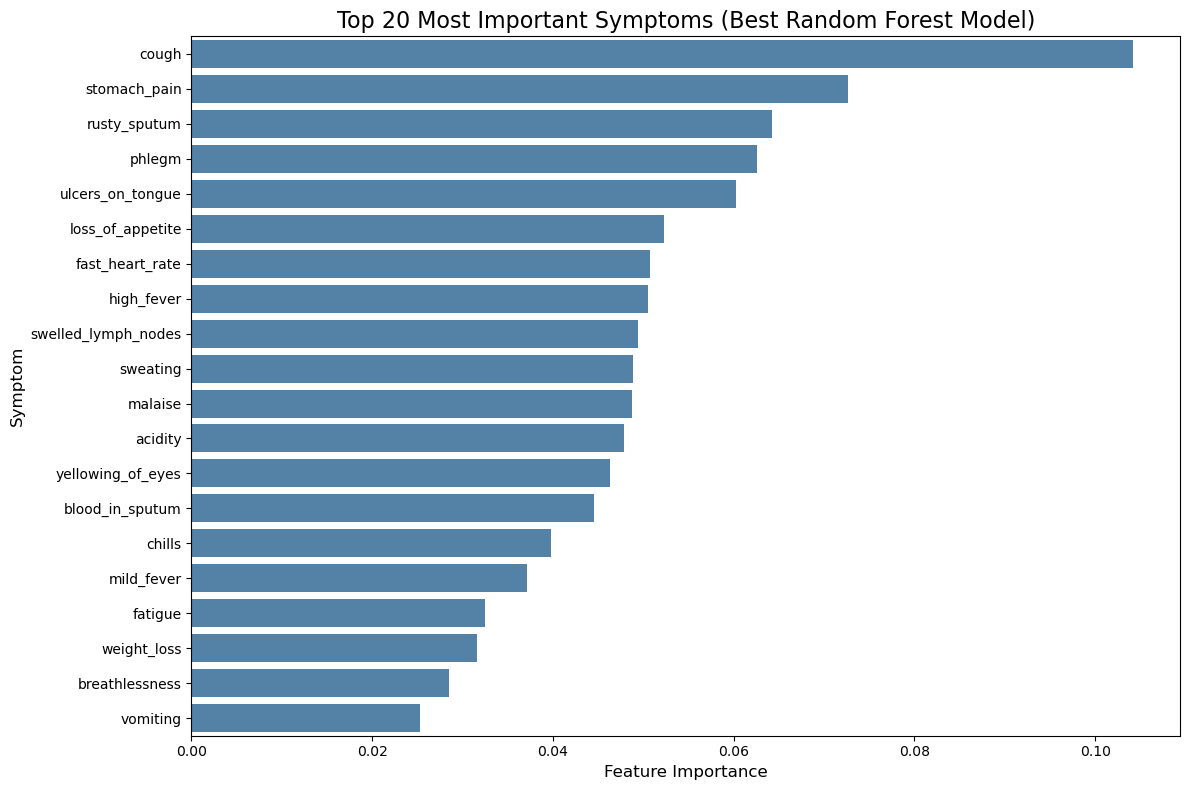

In [33]:
# Lets find feature importances from Random Forest Model

importances = best_rf_model.feature_importances_ # feature importance
feature_importances = pd.Series(importances, index=X_train.columns) # Converted to a dataframe
feature_importances_sorted = feature_importances.sort_values(ascending=False) # Sort by descending

print("\nTop 20 Most Important Symptoms (from Best Random Forest Model):")
print(feature_importances_sorted.head(20))

# --- START OF EDITS for Visualization ---
plt.figure(figsize=(12, 8)) # Standard size for bar plot
sns.barplot(
    x=feature_importances_sorted.head(20).values,
    y=feature_importances_sorted.head(20).index,
    color='steelblue' # Use a single color as requested, no palette
    )
plt.title('Top 20 Most Important Symptoms (Best Random Forest Model)', fontsize=16)
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Symptom', fontsize=12)
plt.tight_layout()
plt.show()

## Reflection and Discussion

**How Random Forest Works:**
Random Forest is an ensemble learning method that builds a "forest" of many individual Decision Trees. Each tree is trained on a random subset of the data (bootstrapping) and considers only a random subset of features at each split. The final prediction is made by aggregating the predictions of all individual trees (e.g., majority vote for classification). This ensemble approach generally reduces overfitting and improves robustness compared to a single Decision Tree.

**Why the Score Could Be 100%:**
If Logistic Regression (linear) and a single Decision Tree (non-linear, full depth) both achieve 100% accuracy, then a Random Forest (an ensemble of Decision Trees designed for robustness and handling complexity) will certainly achieve 100% accuracy if the data is perfectly separable. Its ability to capture complex interactions and its inherent robustness mean it will easily find and exploit any perfect patterns present in the data. It's not overfitting in the traditional sense if the test set also perfectly follows these patterns; rather, it's perfectly learning the data's inherent structure.

**What Can Be Done Potentially:**

Feature Importance Confirmation: The Random Forest's feature importances (which we've already generated above) will be highly reliable in this scenario. They will point directly to the symptoms that are most consistently used by the ensemble of trees to achieve perfect separation. These are our "isolating important symptoms". This could be helpful to a physician.